In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

###Read in dataset and wrangle

In [ ]:
url = 'https://raw.githubusercontent.com/Chinmayrane16/Diamonds-In-Depth-Analysis/master/diamonds.csv'
!pip install category_encoders==2.*
!pip install pdpbox
!pip install shap

df = pd.read_csv(url)

In [ ]:
#drop unnamed column 
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()
#shows how many numerical vs categorical features the dataset has and shows if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()
#further allows to analyze the data and possibly see outliers
#X, Y, Z are supposed to be length, width, and height. they shouldn't have 0 values

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]
#drop any instance in which x, y, z = 0

In [ ]:
df.describe() 
# check again to make sure no more 0 values are showing up
#also shows the range of all features (ie. price varies between 326 - 18823, 
    #or the largest carat is 5)

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


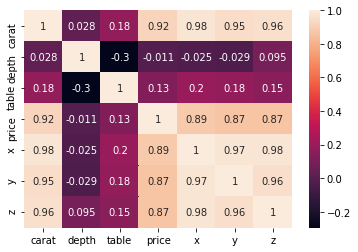

In [ ]:
import seaborn as sns

corr = df.corr()
sns.heatmap(data=corr, annot=True, cbar=True)
#shows us the correlation between features 
#depth is negatively correlated to price. x, y, z are all highly correlated and
    #seem almost equally correlated. Carat has the greatest correlation  

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


###Split Data and Establish Baseline 

In [ ]:
#split target and feature matrix  

target = 'price'

X = df.drop(columns=target)
y = df[target]

In [ ]:
#split train and test data 
#no datetime component so do randomized split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#establish baseline
#The mean price of a diamond is $3926 but could be making a $3028 error everytime

from sklearn.metrics import mean_absolute_error, r2_score

y_pred = [y_train.mean()] * len(y_train)

print('Mean price:', y_train.mean())
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Mean price: 3926.5314586424333
Baseline MAE: 3028.8961859552255


###Linear Regression Model

In [ ]:
#build a model 
#building a linear regression model since my target variable is constant 
#built a pipeline so I can transform my categorical variables and create my model in one go

from category_encoders import OneHotEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 

lr_model = make_pipeline (OneHotEncoder(use_cat_names=True),
                            StandardScaler(),
                            LinearRegression())
lr_model.fit(X_train,y_train);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
#check metrics 
#our baseline MAE was $3028, our lr_model MAE is much better

from sklearn.metrics import mean_absolute_error, r2_score

lr_train_mae = mean_absolute_error(y_train, lr_model.predict(X_train))
lr_test_mae = mean_absolute_error(y_test, lr_model.predict(X_test))

print('Linear Training MAE:', lr_train_mae)
print('Linear Test MAE:', lr_test_mae)

Linear Training MAE: 737.752081653862
Linear Test MAE: 726.6325266004237


In [ ]:
lr_train_R2 = lr_model.score(X_train, y_train)
lr_test_R2 = lr_model.score(X_test, y_test)

print('Linear Model Training R2:', lr_train_R2)
print('Linear Model Test R2:', lr_test_R2)

Linear Model Training R2: 0.918645564654235
Linear Model Test R2: 0.9193775153330541


###Ridge Regression Model 

In [ ]:
#build ridge regression model 
r_model = make_pipeline (OneHotEncoder(use_cat_names=True),
                            StandardScaler(),
                            Ridge(alpha=1.0))
r_model.fit(X_train,y_train);

In [ ]:
#check model_r metrics
#MAE and R2 for model_r are pretty much the same 
r_train_mae = mean_absolute_error(y_train, r_model.predict(X_train))
r_test_mae = mean_absolute_error(y_test, r_model.predict(X_test))

print('Ridge Training MAE:', r_train_mae)
print('Ridge Test MAE:', r_test_mae)

Ridge Training MAE: 737.5499968623704
Ridge Test MAE: 726.3834577928163


In [ ]:
r_train_R2 = r_model.score(X_train, y_train)
r_test_R2 = r_model.score(X_test, y_test)

print('Ridge Model Training R2:', r_train_R2)
print('Ridge Model Test R2:', r_test_R2)

Ridge Model Training R2: 0.9186462778966479
Ridge Model Test R2: 0.9195742224539151


###XGBoost Model 

In [ ]:
#build xgboost model 

from xgboost import XGBRegressor

xgb_model = make_pipeline(OneHotEncoder(),
                          XGBRegressor())

In [ ]:
#tune hyperparameters

xgb_params = {
    'xgbregressor__max_depth' : range(8,16,2),
    'xgbregressor__n_estimators' : range(20,30,2)}

xgb_rs_model = RandomizedSearchCV(xgb_model,
                              param_distributions = xgb_params,
                              n_iter = 5,
                              cv = 5,
                              n_jobs = -1)

xgb_rs_model.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[02:02:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_rs_model.best_params_

{'xgbregressor__max_depth': 12, 'xgbregressor__n_estimators': 28}

In [ ]:
xgb_rs_model.best_score_

0.9733928514835588

In [ ]:
#check metrics of xgboost model
#xgb_rs_model is still better than lr_model and r_model but not better than rf_rs_model

print('XGB Randomized Search Train R2', xgb_rs_model.score(X_train,y_train))
print('XGB Randomized Search Test R2', xgb_rs_model.score(X_test,y_test))

XGB Randomized Search Train R2 0.9832926978524503
XGB Randomized Search Test R2 0.975854320294591


In [ ]:
xgb_rs_train_mae = mean_absolute_error(y_train, xgb_rs_model.predict(X_train))
xgb_rs_test_mae = mean_absolute_error(y_test, xgb_rs_model.predict(X_test))

print('XGB RS Training MAE:', xgb_rs_train_mae)
print('XGB RS Test MAE:', xgb_rs_test_mae)

XGB RS Training MAE: 288.4646554042748
XGB RS Test MAE: 337.99065142215534


###Random Forest Regressor 

In [ ]:
#build random forest regressor model 
from category_encoders import OneHotEncoder 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor

rf_model = make_pipeline(OneHotEncoder(),
                         RandomForestRegressor(random_state=42))


In [ ]:
#tune model with a randomized search cv model

from sklearn.model_selection import RandomizedSearchCV

params = {
    'randomforestregressor__max_depth' : range(26,36,2),
    'randomforestregressor__n_estimators' : range(50,90,5)}

rf_rs_model = RandomizedSearchCV(rf_model,
                              param_distributions = params,
                              n_iter = 10,
                              cv = 5,
                              n_jobs = -1)

rf_rs_model.fit(X_train, y_train);

In [ ]:
#check best parameters to continue tuning the model
rf_rs_model.best_params_

{'randomforestregressor__max_depth': 34,
 'randomforestregressor__n_estimators': 85}

In [ ]:
rf_rs_model.best_score_

0.9801407063238159

In [ ]:
rf_rs_train_mae = mean_absolute_error(y_train, rf_rs_model.predict(X_train))
rf_rs_test_mae = mean_absolute_error(y_test, rf_rs_model.predict(X_test))

print('Random Forest RS Training MAE:', rf_rs_train_mae)
print('Random Forest RS Test MAE:', rf_rs_test_mae)


Random Forest RS Training MAE: 101.73195968072004
Random Forest RS Test MAE: 264.1854374260845


In [ ]:
#check metrics 
#rf_rs_model performs much better than our baseline MAE and than both of our previous models 

rf_rs_train_R2 = rf_rs_model.score(X_train, y_train)
print('Random Forest Training R2:', rf_rs_train_R2)

rf_rs_test_R2 = rf_rs_model.score(X_test, y_test)
print('Random Forest RS Model Test R2:', rf_rs_test_R2)


Random Forest Training R2: 0.9972462773095373
Random Forest RS Model Test R2: 0.982953641106794


In [ ]:
#shows us the predicted prices for X_test according to the rf_rs_model

y_pred = rf_rs_model.predict(X_test)
predictions = pd.DataFrame(y_pred, columns=['price'])
predictions.head()

,price
0,991.152941
1,8074.364706
2,11014.671658
3,1041.847059
4,880.858824


###Communicate Results 

The Random Forest Randomized Search CV model (rf_rs_model) seems to have the best performance. Our Baseline MAE was 3028.89 but the rf_rs_model brought that down to about 101 for the train set and 264 for the test set. rf_rs_model also has an R2 of 98-99.7%.


Text(0.5, 0, 'Reduction in Gini Impurity')

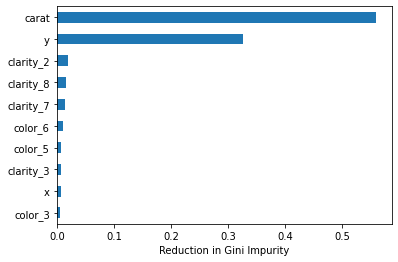

In [ ]:
#Top 10 feature importances 
importances = rf_rs_model.best_estimator_.named_steps['randomforestregressor'].feature_importances_
features = rf_rs_model.best_estimator_.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity')

Feature importance shows us the the reduction in Gini Impurity in our Random Forest model that is caused by each of our features. So here we see that Carat causes a great reduction in Gini impurity as does y (width). So we see importance that each feature plays in relation to price.

In [ ]:
#Permutation Importance 

from sklearn.inspection import permutation_importance

X_train_T = rf_rs_model.best_estimator_.named_steps['onehotencoder'].transform(X_train)
T_model = rf_rs_model.best_estimator_.named_steps['randomforestregressor']

perm_imp = permutation_importance(T_model,
                                  X_train_T,
                                  y_train,
                                  n_repeats=5,
                                  n_jobs=-1, 
                                  random_state=42)

Text(0, 0.5, 'feature name')

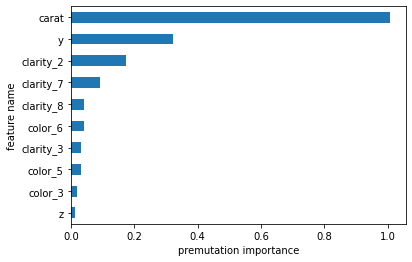

In [ ]:
pd.Series(perm_imp['importances_mean'], index=features).sort_values().tail(10).plot(kind='barh')
plt.xlabel('premutation importance')
plt.ylabel('feature name')

Permutation importance shows us the feature importance based on the decrease in the performance of our model when each of our features is shuffled. So it displays how dependent our model is on each of our features. Here, the feature importance and permutation importance are telling us the same thing; that carat, width, and clarity 2 are the top 3 most imporatant features when it comes to predicting the price of a diamond. 

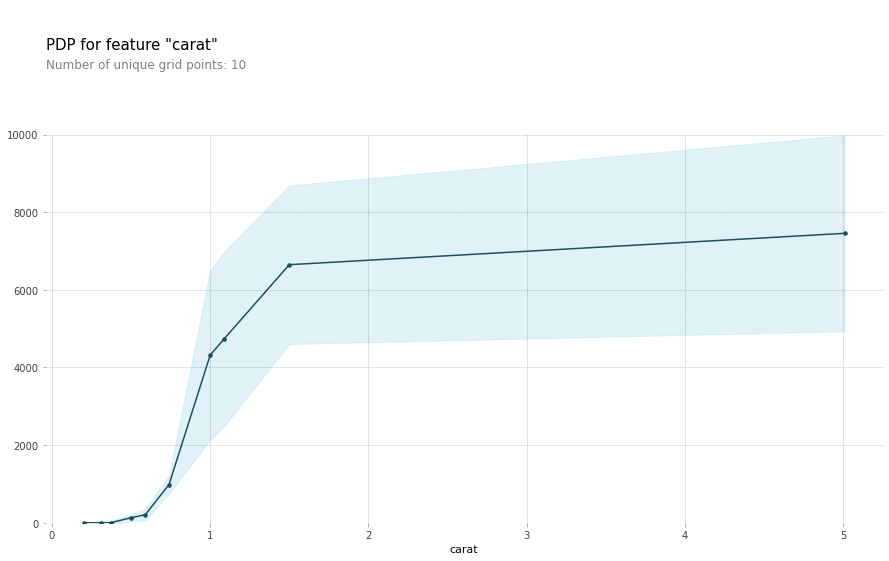

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

isolated = pdp_isolate(model=T_model, 
                       dataset=X_train_T, 
                       model_features=X_train_T.columns,
                       feature= 'carat')

pdp_plot(isolated,feature_name='carat')
plt.ylim((0, 10000));

As carat has been determined to be the most important feature in predicting the price of a diamond I wanted to see the pdp plot for it. This shows us that the most change in price that we see based off of carat is only between 0-1.5 carats. After 1.5 carats the price doesnt really get effected that significantly. Under 1.5 carats the price of a diamond increases from 0 to about 6500. After 1.5 carats the price only really increases about another 1500. 